# Vertebrae detection with YOLO

Result✨:
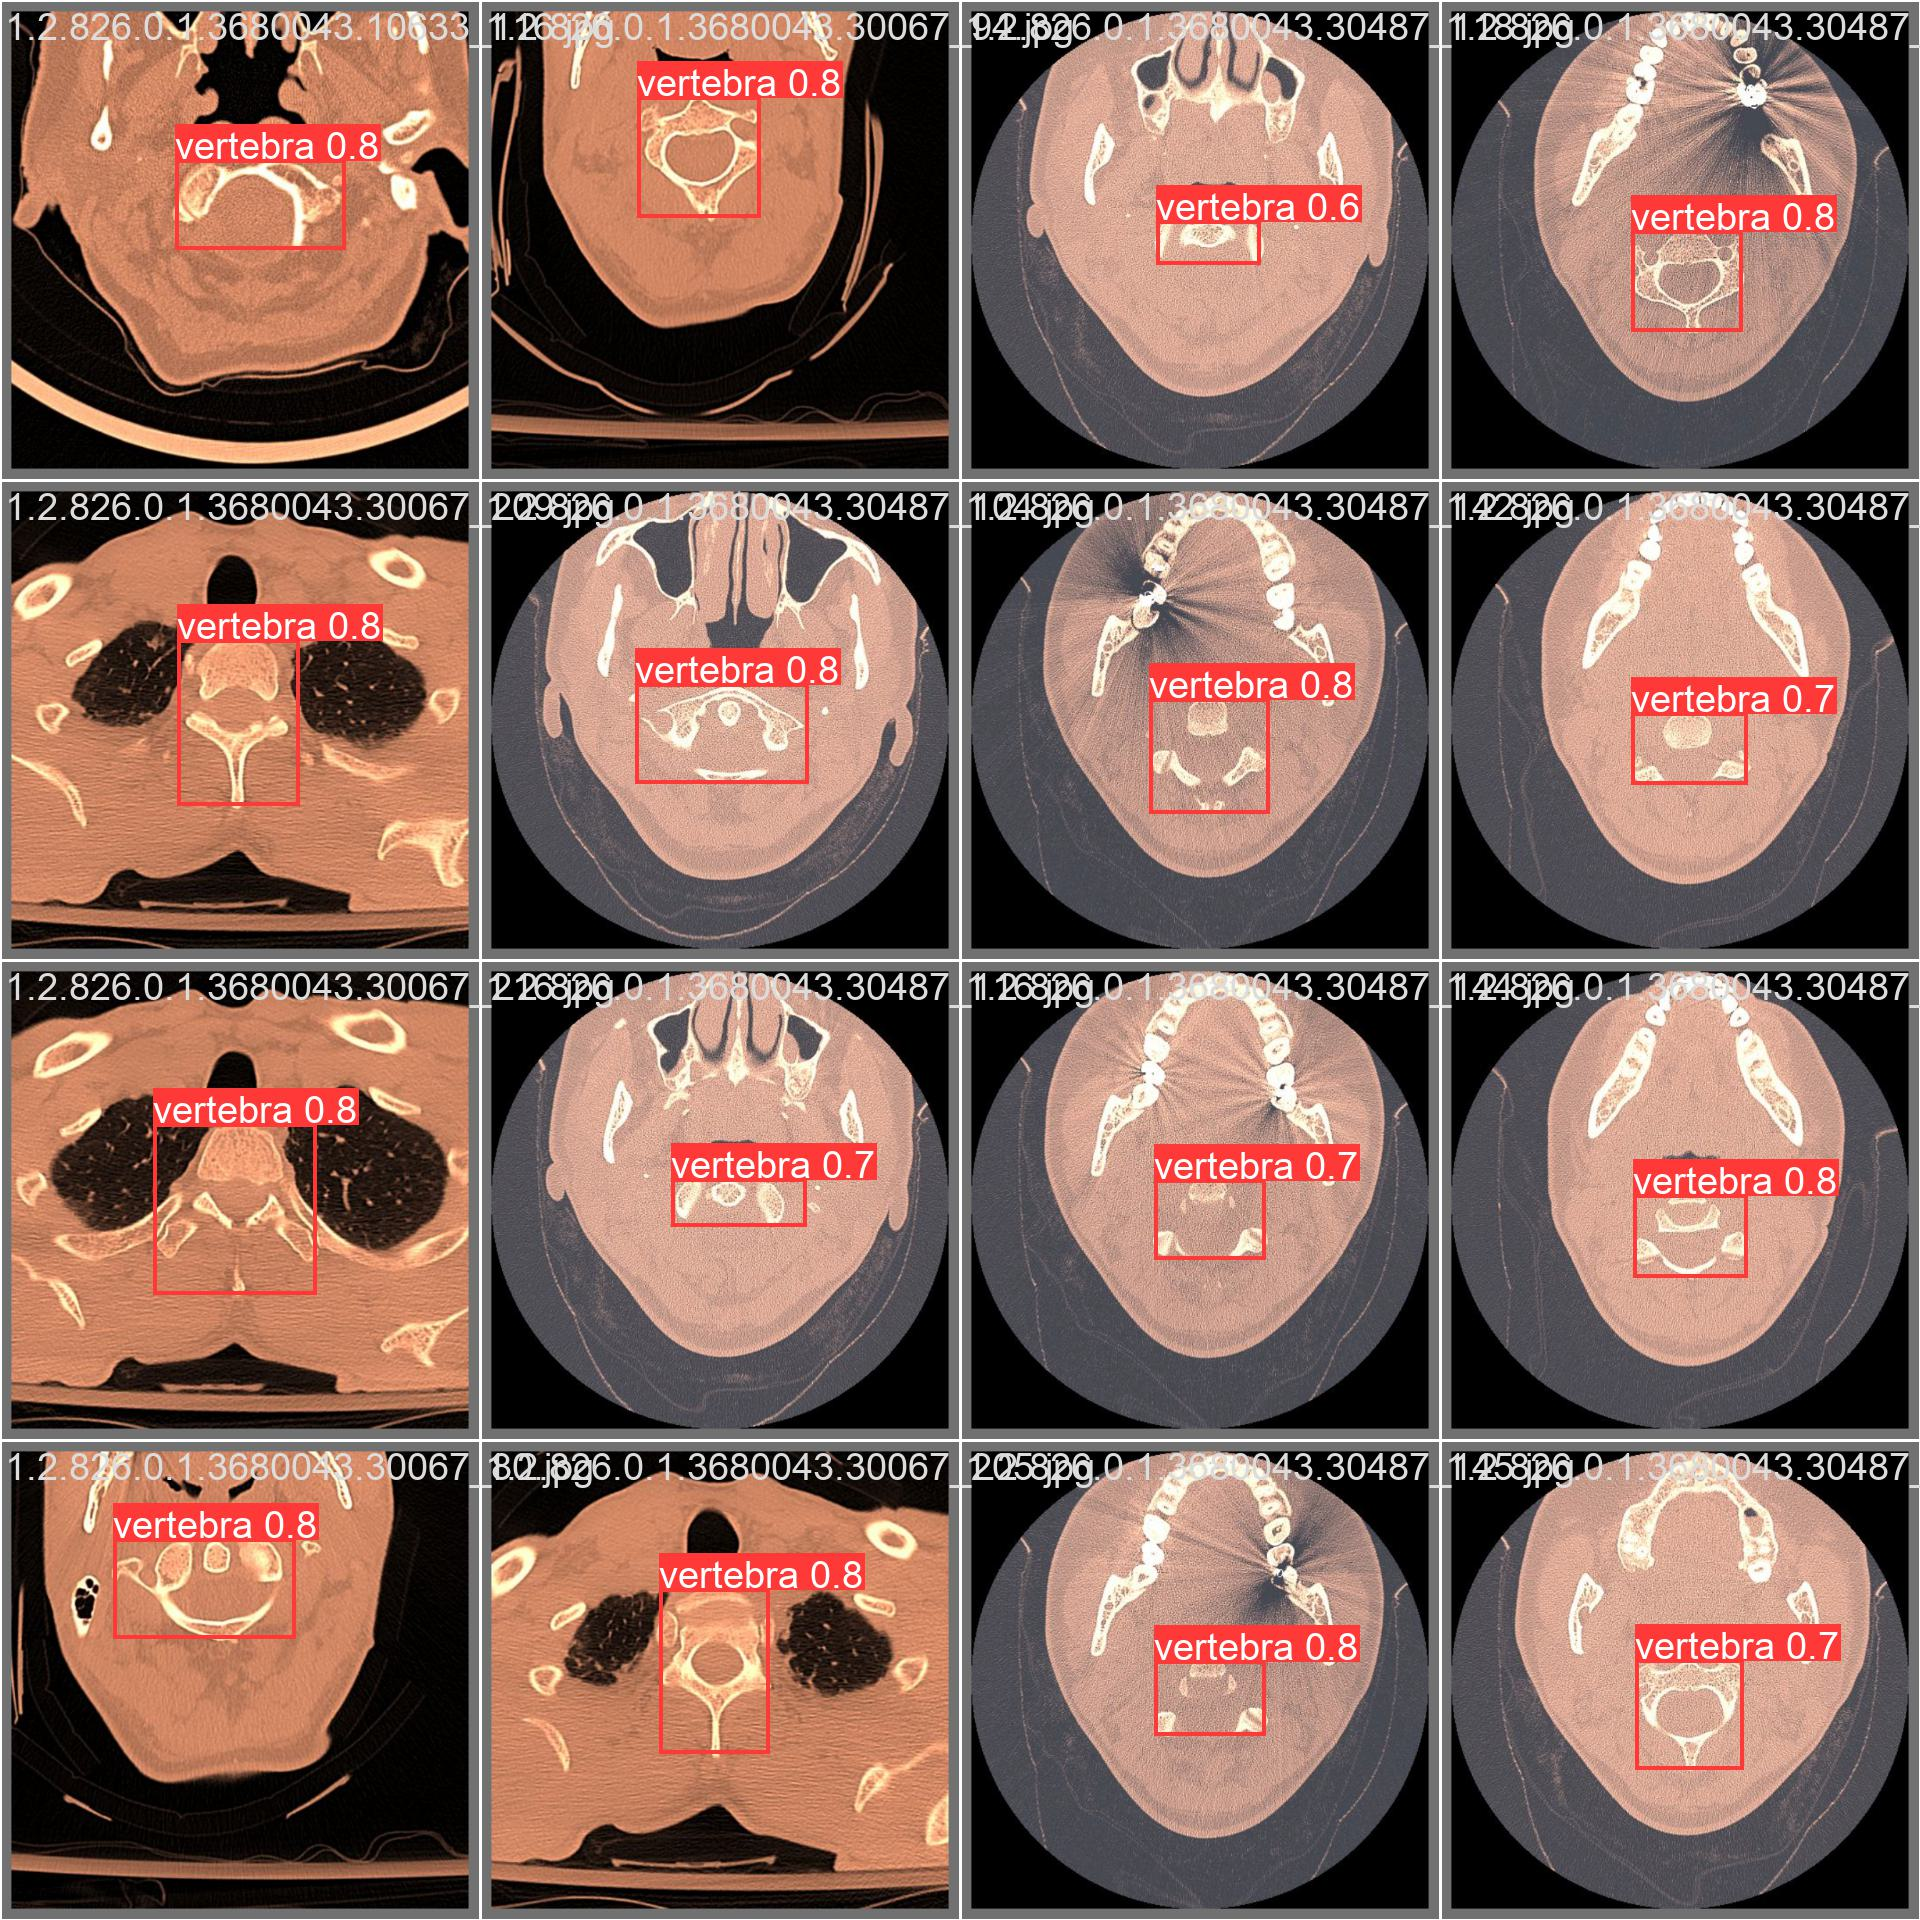

# Install Ultralytics YOLOv5, prepare for training

In [1]:
import os
import random
import shutil
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import cv2
from PIL import Image

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

In [ ]:
# Move preprocessed data from the '[Preprocess] Cropping Vertebrae with YOLO 🦴]' Notebook
# to kaggle/working folder (as input directory is not writable and the training code needs to cache some data)
src = '/kaggle/input/yolo-cropping-vertebrae-windowed'
dst = '/kaggle/working/yolo-cropping-vertebrae-windowed'
shutil.copytree(src, dst)

In [ ]:
data_path = '/kaggle/working/preprocess-cropping-vertebrae-with-yolo'
train_images_path = os.path.join(data_path, 'train', 'images')
train_labels_path = os.path.join(data_path, 'train', 'labels')
valid_images_path = os.path.join(data_path, 'valid', 'images')
valid_labels_path = os.path.join(data_path, 'valid', 'labels')

Training ultralytics YOLOv5 requires a yaml file indicating the location of training and validation images (location of labels is automatically assumed by the training code 'train.py' to be in the same directory but with the name 'labels' instead of 'images'):

In [ ]:
%%writefile dataset.yaml
#dataset.yaml
train: /kaggle/working/yolo-cropping-vertebrae-windowed/train/images
val: /kaggle/working/yolo-cropping-vertebrae-windowed/valid/images
    
#Classes
nc: 1 # number of classes
names: ['vertebra']

# Training!
Code for training has already been written by the Ultralytics team, so we just use that! In the following command, the --epochs flag is used to specify the number of epochs to train for (here I just train for a few epochs as a demonstration); --data flag is used to specify the path of the yaml file we defined above; and the --weights flag is used to specify the path of the starting weights file (but just putting 'yolov5s.pt' here works as well and begins training using yolov5 weights). I have already traind for 20 and 60 epochs respectively and uploaded the results as a dataset seen in kaggle/input/yolo-vertebra. <br>

Here are some references to YOLOv5 by Ultralytics:
- https://www.kaggle.com/code/ultralytics/yolov5
- https://github.com/ultralytics/yolov5

In [ ]:
!python train.py --img 640 --batch 16 --epochs 2 --data /kaggle/working/yolov5/dataset.yaml --weights yolov5s.pt

In [ ]:
#!python train.py --img 640 --batch 16 --epochs 1 --data /kaggle/working/dataset.yaml --weights /kaggle/input/yolo-vertebra/best_epoch20.pt

The trained weights are saved in "/kaggle/working/runs/train/exp/weights"

In [ ]:
os.listdir('/kaggle/working/yolov5/runs/train/exp2/weights')

## save files

In [ ]:
os.chdir('/kaggle/working')

In [ ]:
import shutil

output_filename = 'yolo-cropping-vertebrae-windowed'
dir_name = 'yolo-cropping-vertebrae-windowed'
shutil.make_archive(output_filename, 'zip', dir_name)

path = '/kaggle/working/yolo-cropping-vertebrae-windowed/valid/labels'
for file_name in os.listdir(path):
    file = path + '/' + file_name
    if os.path.isfile(file):
        os.remove(file)
path = '/kaggle/working/yolo-cropping-vertebrae-windowed/valid/images'
for file_name in os.listdir(path):
    file = path + '/' + file_name
    if os.path.isfile(file):
        os.remove(file)
        
os.rmdir('/kaggle/working/yolo-cropping-vertebrae-windowed/valid/labels')
os.rmdir('/kaggle/working/yolo-cropping-vertebrae-windowed/valid/images')

path = '/kaggle/working/yolo-cropping-vertebrae-windowed/valid'
for file_name in os.listdir(path):
    file = path + '/' + file_name
    if os.path.isfile(file):
        os.remove(file)
os.rmdir('/kaggle/working/yolo-cropping-vertebrae-windowed/valid')

path = '/kaggle/working/yolo-cropping-vertebrae-windowed/train/labels'
for file_name in os.listdir(path):
    file = path + '/' + file_name
    if os.path.isfile(file):
        os.remove(file)
path = '/kaggle/working/yolo-cropping-vertebrae-windowed/train/images'
for file_name in os.listdir(path):
    file = path + '/' + file_name
    if os.path.isfile(file):
        os.remove(file)

os.rmdir('/kaggle/working/yolo-cropping-vertebrae-windowed/train/labels')
os.rmdir('/kaggle/working/yolo-cropping-vertebrae-windowed/train/images')

path = '/kaggle/working/yolo-cropping-vertebrae-windowed/train'
for file_name in os.listdir(path):
    file = path + '/' + file_name
    if os.path.isfile(file):
        os.remove(file)
os.rmdir('/kaggle/working/yolo-cropping-vertebrae-windowed/train')

# remove folder used for yolo
path = '/kaggle/working/yolo-cropping-vertebrae-windowed'
for file_name in os.listdir(path):
    file = path + '/' + file_name
    if os.path.isfile(file):
        os.remove(file)
os.rmdir('/kaggle/working/yolo-cropping-vertebrae-windowed')

## Inference

In [2]:
# Load weights onto a yolov5 model
# Specify the location of the .pt weights file in path
model = torch.hub.load('ultralytics/yolov5', 'custom',
                       path='/kaggle/input/cropping-vertebrae-yolo-windowed/yolov5/runs/train/exp2/weights/best.pt')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-4-18 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


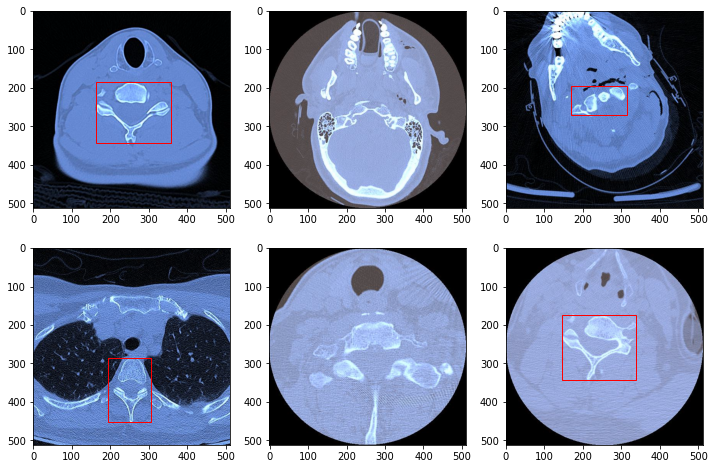

In [3]:
%matplotlib inline

pt_num = 2923 # pick a patient

pt_path = '/kaggle/input/cropping-vertebrae-yolo-windowed/yolo-cropping-vertebrae-windowed/valid/images'
pt_imgs = os.listdir(pt_path)
random_imgs = random.choices(pt_imgs, k=6) # pick six random dcms from the patient's scan

arrs = []
for img in random_imgs:
    imgs_path = os.path.join(pt_path, img)
    image = cv2.imread(imgs_path)
    arr = np.asarray(image)
    arrs.append([img, arr])

bbox_preds = []
for img, arr in arrs:
    result = model(arr)
    #crop = result.crop(save=False)
    #crop = crop[0]['im']
    #print(crop.shape)
    #im = Image.fromarray(crop)
    #im.save(f'/kaggle/working/runs/{img}')
    
    if len(result.xyxy) == 1: # use only the slices where just 1 bbox is detected
        bbox_pred = result.xyxy[0]
        bbox_preds.append(bbox_pred)

fig, ax = plt.subplots(2,3, figsize=(12, 8))
for i, ((img, arr), bbox_pred) in enumerate(zip(arrs, bbox_preds)):
    # First show the dcm (slice of CT scan)
    ax[i//3, i%3].imshow(arr, cmap=plt.get_cmap('bone'))
    
    # Then draw the predicted bbox (if there is just 1 bbox detected)
    if len(bbox_pred) == 1:
        bbox_lt = bbox_pred[0][0].item()
        bbox_rt = bbox_pred[0][2].item()
        bbox_top = bbox_pred[0][1].item()
        bbox_bot = bbox_pred[0][3].item()
        rect = Rectangle((bbox_lt, bbox_top), bbox_rt-bbox_lt, bbox_bot-bbox_top,
                         linewidth=1, edgecolor='r', facecolor='none')
        ax[i//3, i%3].add_patch(rect)

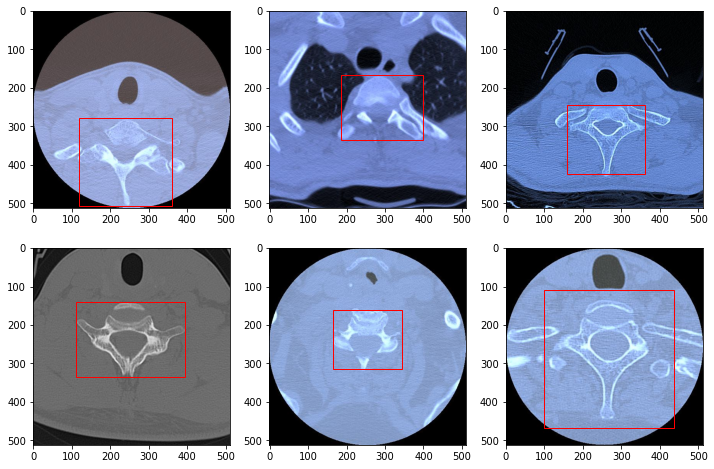

In [4]:
%matplotlib inline

pt_num = 2923 # pick a patient

pt_path = '/kaggle/input/cropping-vertebrae-yolo-windowed/yolo-cropping-vertebrae-windowed/train/images'
pt_imgs = os.listdir(pt_path)
random_imgs = random.choices(pt_imgs, k=6) # pick six random dcms from the patient's scan

arrs = []
for img in random_imgs:
    imgs_path = os.path.join(pt_path, img)
    image = cv2.imread(imgs_path)
    arr = np.asarray(image)
    arrs.append(arr)

bbox_preds = []
for arr in arrs:
    result = model(arr, size=640)
    if len(result.xyxy) == 1: # use only the slices where just 1 bbox is detected
        bbox_pred = result.xyxy[0]
        bbox_preds.append(bbox_pred)

fig, ax = plt.subplots(2,3, figsize=(12, 8))
for i, (arr, bbox_pred) in enumerate(zip(arrs, bbox_preds)):
    # First show the dcm (slice of CT scan)
    ax[i//3, i%3].imshow(arr, cmap=plt.get_cmap('bone'))
    
    # Then draw the predicted bbox (if there is just 1 bbox detected)
    if len(bbox_pred) == 1:
        bbox_lt = bbox_pred[0][0].item()
        bbox_rt = bbox_pred[0][2].item()
        bbox_top = bbox_pred[0][1].item()
        bbox_bot = bbox_pred[0][3].item()
        rect = Rectangle((bbox_lt, bbox_top), bbox_rt-bbox_lt, bbox_bot-bbox_top,
                         linewidth=1, edgecolor='r', facecolor='none')
        ax[i//3, i%3].add_patch(rect)

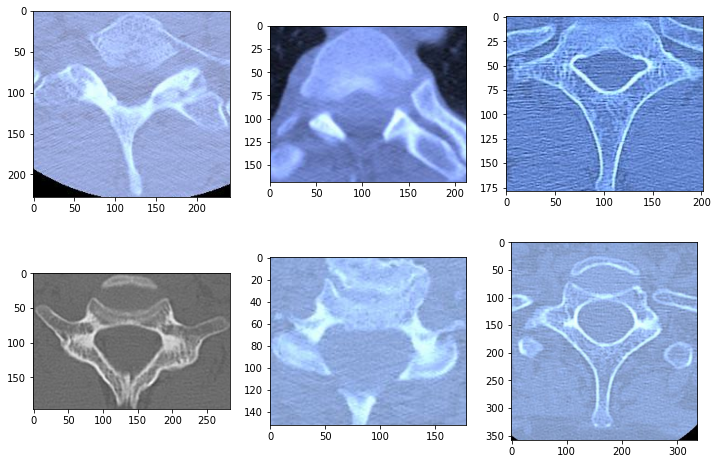

In [5]:
fig, ax = plt.subplots(2,3, figsize=(12, 8))
for i, (arr, bbox_pred) in enumerate(zip(arrs, bbox_preds)):
    if len(bbox_pred) > 0:
        bbox_lt = int(bbox_pred[0][0].item())
        bbox_rt = int(bbox_pred[0][2].item())
        bbox_top = int(bbox_pred[0][1].item())
        bbox_bot = int(bbox_pred[0][3].item())
        arr = arr[bbox_top:bbox_bot, bbox_lt:bbox_rt, :]
    
    ax[i//3, i%3].imshow(arr, cmap=plt.get_cmap('bone'))

## save all predicted image

In [6]:
from tqdm import tqdm
from glob import glob

try: os.mkdir('yolo_image'); os.mkdir('yolo_seg');
except: pass

In [7]:
pt_path = '/kaggle/input/cropping-vertebrae-yolo-windowed/yolo-cropping-vertebrae-windowed/train/images'
pt_imgs = os.listdir(pt_path)
length = int(len(pt_imgs) * 0.5)
pt_imgs1 = pt_imgs[:length]
pt_imgs2 = pt_imgs[length:]

seg_revert = [
    '1.2.826.0.1.3680043.1363',
    '1.2.826.0.1.3680043.20120',
    '1.2.826.0.1.3680043.2243',
    '1.2.826.0.1.3680043.24606',
    '1.2.826.0.1.3680043.32071'
]

In [8]:
arrs = []
for img in tqdm(pt_imgs1):
    imgs_path = os.path.join(pt_path, img)
    image = cv2.imread(imgs_path)
    arr = np.asarray(image)
    arrs.append([img, arr])

for img, arr in tqdm(arrs):
    result = model(arr)
    bbox_pred = result.xyxy[0]
    
    if len(bbox_pred) > 0:
        bbox_lt = int(bbox_pred[0][0].item())
        bbox_rt = int(bbox_pred[0][2].item())
        bbox_top = int(bbox_pred[0][1].item())
        bbox_bot = int(bbox_pred[0][3].item())
        crop = arr[bbox_top:bbox_bot, bbox_lt:bbox_rt, :]
        im = Image.fromarray(crop)
        im.save(f'/kaggle/working/yolo_image/{img}')
        
        uid_id = img[:len(img)-4]
        studyuid = uid_id.split('_')[0]
        if studyuid in seg_revert:
            length = len(glob(f'/kaggle/input/rsna-2022-cervical-spine-fracture-detection/train_images/{studyuid}/*'))
            length = length - int(uid_id.split('_')[1]) - 1
            uid_id = f'{studyuid}_{length}'
        
        seg_crop = np.load(f'/kaggle/input/preprocess-3-channel/{uid_id}.npz')['arr_0']
        seg_crop = seg_crop[bbox_top:bbox_bot, bbox_lt:bbox_rt]
        np.savez_compressed(f'/kaggle/working/yolo_seg/{uid_id}.npz', seg_crop)
        
    else:
        destination = f'/kaggle/working/yolo_image/{img}'
        source = f'/kaggle/input/yolo-cropping-vertebrae-windowed/train/images/{img}'
        shutil.copy(source, destination)

del(arrs)

100%|██████████| 10917/10917 [04:47<00:00, 38.02it/s]


In [9]:
arrs = []
for img in tqdm(pt_imgs2):
    imgs_path = os.path.join(pt_path, img)
    image = cv2.imread(imgs_path)
    arr = np.asarray(image)
    arrs.append([img, arr])

for img, arr in tqdm(arrs):
    result = model(arr)
    bbox_pred = result.xyxy[0]
    
    if len(bbox_pred) > 0:
        bbox_lt = int(bbox_pred[0][0].item())
        bbox_rt = int(bbox_pred[0][2].item())
        bbox_top = int(bbox_pred[0][1].item())
        bbox_bot = int(bbox_pred[0][3].item())
        crop = arr[bbox_top:bbox_bot, bbox_lt:bbox_rt, :]
        im = Image.fromarray(crop)
        im.save(f'/kaggle/working/yolo_image/{img}')
        
        uid_id = img[:len(img)-4]
        studyuid = uid_id.split('_')[0]
        if studyuid in seg_revert:
            length = len(glob(f'/kaggle/input/rsna-2022-cervical-spine-fracture-detection/train_images/{studyuid}/*'))
            length = length - int(uid_id.split('_')[1]) - 1
            uid_id = f'{studyuid}_{length}'
        
        seg_crop = np.load(f'/kaggle/input/preprocess-3-channel/{uid_id}.npz')['arr_0']
        seg_crop = seg_crop[bbox_top:bbox_bot, bbox_lt:bbox_rt]
        np.savez_compressed(f'/kaggle/working/yolo_seg/{uid_id}.npz', seg_crop)
        
    else:
        destination = f'/kaggle/working/yolo_image/{img}'
        source = f'/kaggle/input/yolo-cropping-vertebrae-windowed/train/images/{img}'
        shutil.copy(source, destination)

del(arrs)

100%|██████████| 10917/10917 [04:44<00:00, 38.39it/s]


In [10]:
pt_path = '/kaggle/input/cropping-vertebrae-yolo-windowed/yolo-cropping-vertebrae-windowed/valid/images'
pt_imgs = os.listdir(pt_path)

arrs = []
for img in tqdm(pt_imgs):
    imgs_path = os.path.join(pt_path, img)
    image = cv2.imread(imgs_path)
    arr = np.asarray(image)
    arrs.append([img, arr])

for img, arr in tqdm(arrs):
    result = model(arr)
    bbox_pred = result.xyxy[0]
    
    if len(bbox_pred) > 0:
        bbox_lt = int(bbox_pred[0][0].item())
        bbox_rt = int(bbox_pred[0][2].item())
        bbox_top = int(bbox_pred[0][1].item())
        bbox_bot = int(bbox_pred[0][3].item())
        crop = arr[bbox_top:bbox_bot, bbox_lt:bbox_rt, :]
        im = Image.fromarray(crop)
        im.save(f'/kaggle/working/yolo_image/{img}')
        
        uid_id = img[:len(img)-4]
        studyuid = uid_id.split('_')[0]
        if studyuid in seg_revert:
            length = len(glob(f'/kaggle/input/rsna-2022-cervical-spine-fracture-detection/train_images/{studyuid}/*'))
            length = length - int(uid_id.split('_')[1]) - 1
            uid_id = f'{studyuid}_{length}'
        
        seg_crop = np.load(f'/kaggle/input/preprocess-3-channel/{uid_id}.npz')['arr_0']
        seg_crop = seg_crop[bbox_top:bbox_bot, bbox_lt:bbox_rt]
        np.savez_compressed(f'/kaggle/working/yolo_seg/{uid_id}.npz', seg_crop)
        
    else:
        destination = f'/kaggle/working/yolo_image/{img}'
        source = f'/kaggle/input/yolo-cropping-vertebrae-windowed/valid/images/{img}'
        shutil.copy(source, destination)

del(arrs)

100%|██████████| 2426/2426 [01:03<00:00, 38.49it/s]


In [13]:
pt_path = '/kaggle/input/cropping-vertebrae-yolo-windowed/yolo_slices'
pt_imgs = os.listdir(pt_path)

arrs = []
for img in tqdm(pt_imgs):
    imgs_path = os.path.join(pt_path, img)
    image = cv2.imread(imgs_path)
    arr = np.asarray(image)
    arrs.append([img, arr])

for img, arr in tqdm(arrs):
    result = model(arr)
    bbox_pred = result.xyxy[0]
    
    if len(bbox_pred) > 0:
        bbox_lt = int(bbox_pred[0][0].item())
        bbox_rt = int(bbox_pred[0][2].item())
        bbox_top = int(bbox_pred[0][1].item())
        bbox_bot = int(bbox_pred[0][3].item())
        crop = arr[bbox_top:bbox_bot, bbox_lt:bbox_rt, :]
        im = Image.fromarray(crop)
        im.save(f'/kaggle/working/yolo_image/{img}')
        
        uid_id = img[:len(img)-4]
        studyuid = uid_id.split('_')[0]
        if studyuid in seg_revert:
            length = len(glob(f'/kaggle/input/rsna-2022-cervical-spine-fracture-detection/train_images/{studyuid}/*'))
            length = length - int(uid_id.split('_')[1]) - 1
            uid_id = f'{studyuid}_{length}'
        
        seg_crop = np.load(f'/kaggle/input/preprocess-3-channel/{uid_id}.npz')['arr_0']
        seg_crop = seg_crop[bbox_top:bbox_bot, bbox_lt:bbox_rt]
        np.savez_compressed(f'/kaggle/working/yolo_seg/{uid_id}.npz', seg_crop)
        
    else:
        destination = f'/kaggle/working/yolo_image/{img}'
        source = f'/kaggle/input/cropping-vertebrae-yolo-windowed/yolo_slices/{img}'
        shutil.copy(source, destination)

del(arrs)

100%|██████████| 5573/5573 [01:25<00:00, 65.13it/s]


## Compress Files

In [14]:
import shutil

output_filename = 'yolo_image'
dir_name = 'yolo_image'
shutil.make_archive(output_filename, 'zip', dir_name)

path = '/kaggle/working/yolo_image'
for file_name in os.listdir(path):
    file = path + '/' + file_name
    if os.path.isfile(file):
        os.remove(file)
os.rmdir('yolo_image')

output_filename = 'yolo_seg'
dir_name = 'yolo_seg'
shutil.make_archive(output_filename, 'zip', dir_name)

path = '/kaggle/working/yolo_seg'
for file_name in os.listdir(path):
    file = path + '/' + file_name
    if os.path.isfile(file):
        os.remove(file)
os.rmdir('yolo_seg')